In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
import sys
sys.path.append('.\SAC')
sys.path.append('.\TD3')
# print(sys.path)

from SAC.eval_model import eval_agent as eval_sac
from SAC.soft_actor_critic import SacAgent
from td3.TD3 import TD3Agent
from td3.eval_model import eval_agent as eval_td3

import laserhockey.hockey_env as h_env

In [56]:
env = h_env.HockeyEnv()
ac_space = env.action_space
o_space = env.observation_space

agent_sac = SacAgent(env.observation_space, env.action_space, automatic_entropy_tuning=True)
agent_td3 = TD3Agent(env.observation_space, env.action_space)

path_sac = 'SAC/checkpoints/tournament_agent'
path_td3 = 'td3/checkpoints/td3_checkpoint_hockey_2x256_aR_tau=0.0025_normal_weak=False_e=25000_r=6.9719'

basic_weak_opponent = h_env.BasicOpponent(weak=True)
basic_strong_opponent = h_env.BasicOpponent(weak=False)

# load model parameters
agent_sac.load_checkpoint(path_sac, load_buffer=False)
agent_td3.load_checkpoint(path_td3, load_buffer=False)

print(agent_sac.train_log)
print(agent_td3.train_log)

cpu
cpu
Loading models from SAC/checkpoints/tournament_agent
Loading models from td3/checkpoints/td3_checkpoint_hockey_2x256_aR_tau=0.0025_normal_weak=False_e=25000_r=6.9719
['Trained in mode defense with weak=False opponent for 15000 episodes, mean reward: 5.1314449919318585', 'Trained in mode normal with weak=True opponent for 25000 episodes, mean reward: 8.264968570386724', 'Trained in mode normal with weak=False opponent for 25000 episodes, mean reward: 6.0621432081315065']
['Trained in mode defense with weak=False opponent for 25000 episodes, mean reward: 6.380768684684955', 'Trained in mode normal with weak=True opponent for 25000 episodes, mean reward: 8.885435391468839', 'Trained in mode normal with weak=False opponent for 25000 episodes, mean reward: 6.971863795743858']


In [57]:
eval_episodes = 2000
# eval in defense mode
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
winner_defense_sac = eval_sac(agent_sac, None, env, episodes=eval_episodes, render=False)
winner_defense_td3 = eval_td3(agent_td3, None, env, episodes=eval_episodes, render=False)

Agent won 1083 games, lost 549 games, draw 368 games
Win/Loss+Win Ratio 0.6636029411764706
Average reward over 2000 episodes: -0.12114026864603283
Agent won 1352 games, lost 468 games, draw 180 games
Win/Loss+Win Ratio 0.7428571428571429
Average reward over 2000 episodes: 2.217423269263859


In [58]:
# eval in shooting mode
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
winner_shooting_sac = eval_sac(agent_sac, None, env, episodes=eval_episodes, render=False)
winner_shooting_td3 = eval_td3(agent_td3, None, env, episodes=eval_episodes, render=False)

Agent won 1097 games, lost 72 games, draw 831 games
Win/Loss+Win Ratio 0.9384088964927289
Average reward over 2000 episodes: -3.7883759658535165
Agent won 1105 games, lost 74 games, draw 821 games
Win/Loss+Win Ratio 0.9372349448685326
Average reward over 2000 episodes: -4.338813232428658


In [59]:
# eval against weak opponent
env = h_env.HockeyEnv()
winner_weak_sac = eval_sac(agent_sac, basic_weak_opponent, env, episodes=eval_episodes, render=False)
winner_weak_td3 = eval_td3(agent_td3, basic_weak_opponent, env, episodes=eval_episodes, render=False)

Agent won 1794 games, lost 153 games, draw 53 games
Win/Loss+Win Ratio 0.9214175654853621
Average reward over 2000 episodes: 7.556593855362187
Agent won 1967 games, lost 16 games, draw 17 games
Win/Loss+Win Ratio 0.9919314170448815
Average reward over 2000 episodes: 9.350398453455774


In [60]:
# eval against strong opponent
env = h_env.HockeyEnv()
winner_strong_sac = eval_sac(agent_sac, basic_strong_opponent, env, episodes=eval_episodes, render=False)
winner_strong_td3 = eval_td3(agent_td3, basic_strong_opponent, env, episodes=eval_episodes, render=False)

Agent won 1963 games, lost 29 games, draw 8 games
Win/Loss+Win Ratio 0.9854417670682731
Average reward over 2000 episodes: 9.230438798860854
Agent won 1961 games, lost 35 games, draw 4 games
Win/Loss+Win Ratio 0.9824649298597194
Average reward over 2000 episodes: 9.187364376753


In [61]:
# adjusted function
def compute_win_ratio_2(winners):
    winners = np.asarray(winners)
    win_ratio = winners[0] / (winners[0] + winners[1] + winners[2])
    draw_ratio = winners[2] / (winners[0] + winners[1] + winners[2])
    return win_ratio, draw_ratio

In [62]:
ratio_defense_sac, d_defense_sac = compute_win_ratio_2(winner_defense_sac)
ratio_defense_td3, d_defense_td3 = compute_win_ratio_2(winner_defense_td3)

ratio_shooting_sac, d_shooting_sac = compute_win_ratio_2(winner_shooting_sac)
ratio_shooting_td3, d_shooting_td3 = compute_win_ratio_2(winner_shooting_td3)

ratio_weak_sac, d_weak_sac = compute_win_ratio_2(winner_weak_sac)
ratio_weak_td3, d_weak_td3 = compute_win_ratio_2(winner_weak_td3)

ratio_strong_sac, d_strong_sac = compute_win_ratio_2(winner_strong_sac)
ratio_strong_td3, d_strong_td3 = compute_win_ratio_2(winner_strong_td3)

In [63]:
df_eval = pd.DataFrame(columns=['mode', 'algorithm','win_ratio', 'draw_ratio'])
df_eval.loc[len(df_eval)] =  ['defense', 'SAC', ratio_defense_sac, d_defense_sac]
df_eval.loc[len(df_eval)] =  ['defense', 'TD3', ratio_defense_td3, d_defense_td3]
df_eval.loc[len(df_eval)] =  ['shooting', 'SAC', ratio_shooting_sac, d_shooting_sac]
df_eval.loc[len(df_eval)] =  ['shooting', 'TD3', ratio_shooting_td3, d_shooting_td3]
df_eval.loc[len(df_eval)] =  ['weak', 'SAC', ratio_weak_sac, d_weak_sac]
df_eval.loc[len(df_eval)] =  ['weak', 'TD3', ratio_weak_td3, d_weak_td3]
df_eval.loc[len(df_eval)] =  ['strong', 'SAC', ratio_strong_sac, d_strong_sac]
df_eval.loc[len(df_eval)] =  ['strong', 'TD3', ratio_strong_td3, d_strong_td3]

df_eval

,mode,algorithm,win_ratio,draw_ratio
0,defense,SAC,0.5415,0.1840
1,defense,TD3,0.6760,0.0900
2,shooting,SAC,0.5485,0.4155
3,shooting,TD3,0.5525,0.4105
4,weak,SAC,0.8970,0.0265
5,weak,TD3,0.9835,0.0085
6,strong,SAC,0.9815,0.0040
7,strong,TD3,0.9805,0.0020


In [64]:
# make added column for stacked barplot
df_eval['draw_ratio'] = df_eval['win_ratio'] + df_eval['draw_ratio']

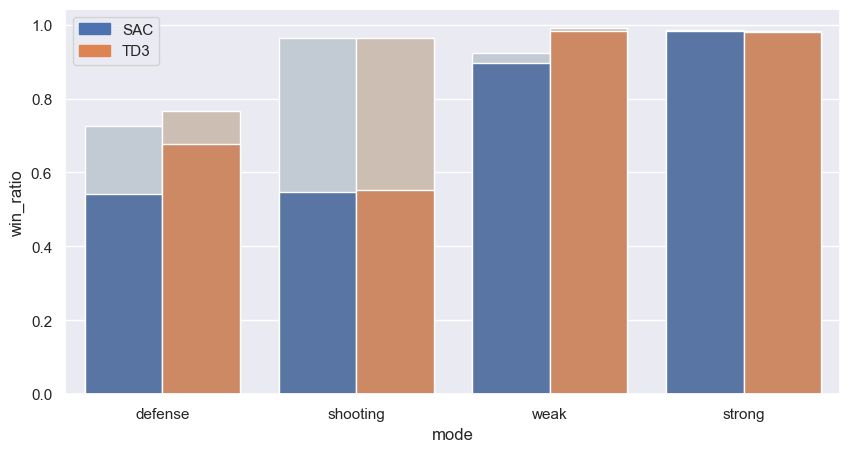

In [65]:
import matplotlib.patches as mpatches

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})

bar1 = sns.barplot(data=df_eval, x="mode", y="draw_ratio", hue="algorithm", palette='pastel', saturation=0.2)
bar2 = sns.barplot(data=df_eval, x="mode", y="win_ratio", hue="algorithm")

# add legend
top_bar = mpatches.Patch(color='#4c72b0', label='SAC')
bottom_bar = mpatches.Patch(color='#dd8452', label='TD3')
plt.legend(handles=[top_bar, bottom_bar])
fig = bar2.get_figure()
fig.savefig('td3/plots/comparison_SAC_TD3_plot')
plt.show()


Performance against Basic Opponent

In [66]:
with open('td3/stats/td3_checkpoint_hockey_tau=0.0025_normal_2x256_weak=True_e=25000_r=8.8854.pkl', 'rb') as f:
    td3_dict_weak = pickle.load(f)
with open('td3/stats/td3_checkpoint_hockey_2x256_aR_tau=0.0025_normal_weak=False_e=25000_r=6.9719.pkl', 'rb') as f:
    td3_dict_strong = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'td3/stats/td3_checkpoint_hockey_tau=0.0025_normal_2x256_weak=True_e=25000_r=8.8854.pkl'

In [ ]:
def compute_win_ratio(winners):
    winners = np.asarray(winners)
    win_ratio = winners[:, 0] / (winners[:, 0] + winners[:, 1] + winners[:, 2])
    return win_ratio

In [ ]:
winners_td3_strong = np.asarray(td3_dict_strong['winners'])
winners_td3_weak = np.asarray(td3_dict_weak['winners'])

win_ratio_td3_strong = compute_win_ratio(winners_td3_strong)
win_ratio_td3_weak = compute_win_ratio(winners_td3_weak)

In [ ]:
# append stats of weak and strong opponent
win_ratio_td3 = np.append(win_ratio_td3_weak, win_ratio_td3_strong)

In [ ]:
winner_df = pd.DataFrame({'TD3': win_ratio_td3})
winner_df = winner_df.reset_index()
winner_df = winner_df.rename(columns={'index': 'episodes'})
winner_df['episodes'] = winner_df['episodes'] * 500
winner_df = winner_df.melt(id_vars=['episodes'], var_name='algorithm', value_name='win_ratio')
winner_df.head()
winner_df.to_csv('td3_winner_df')

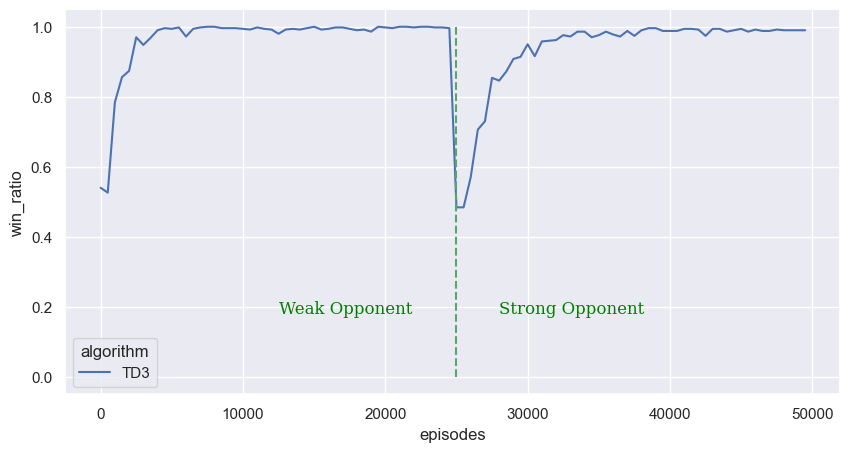

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='algorithm', data=winner_df)
# ax.set_xticks([0, 25000], labels=['Weak Opponent', 'Strong Opponent'])
ax.vlines(25000, 0, 1, 'g', linestyles='dashed')
font = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 12,
        }

ax.text(28000, 0.18, 'Strong Opponent', fontdict=font)
ax.text(12500, 0.18, 'Weak Opponent', fontdict=font)

fig = ax.get_figure()

fig.savefig('td3/plots/basic_opponent_plot')